In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [6]:
# simple, manual label encoding using map method
tips['smoker_bin'] = tips['smoker'].map({
    'Yes': 1,
    'No' : 0}
)

tips['sex_bin'] = tips['sex'].map({
    'Male': 1,
    'Female' : 0}
)

tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,smoker_bin,sex_bin
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1


In [9]:
X = tips[:-1]
X.head()

,total_bill,tip,sex,smoker,day,time,size,smoker_bin,sex_bin
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0


In [ ]:
# X = tips[['smoker_bin']] # 0101011101110101
y = tips['tip'] # continous

# convert the target column, then use it for y


X = tips[['total_bill', ' ', ]] 
y = tips['sex_bin'] # encoded column

# yes, how much did they tip?
# are we predicting a continous value?

In [ ]:
model_dt = DecisionTreeClassifier() # classification
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, test_size=0.2)
model_dt.fit(X_train, y_train) # fitting here, must be numeric
y_pred_dt = model_dt.predict(X_test)

In [ ]:
cr_dt = classification_report(y_test,y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.48      0.58      0.52        19
           1       0.69      0.60      0.64        30

    accuracy                           0.59        49
   macro avg       0.59      0.59      0.58        49
weighted avg       0.61      0.59      0.60        49



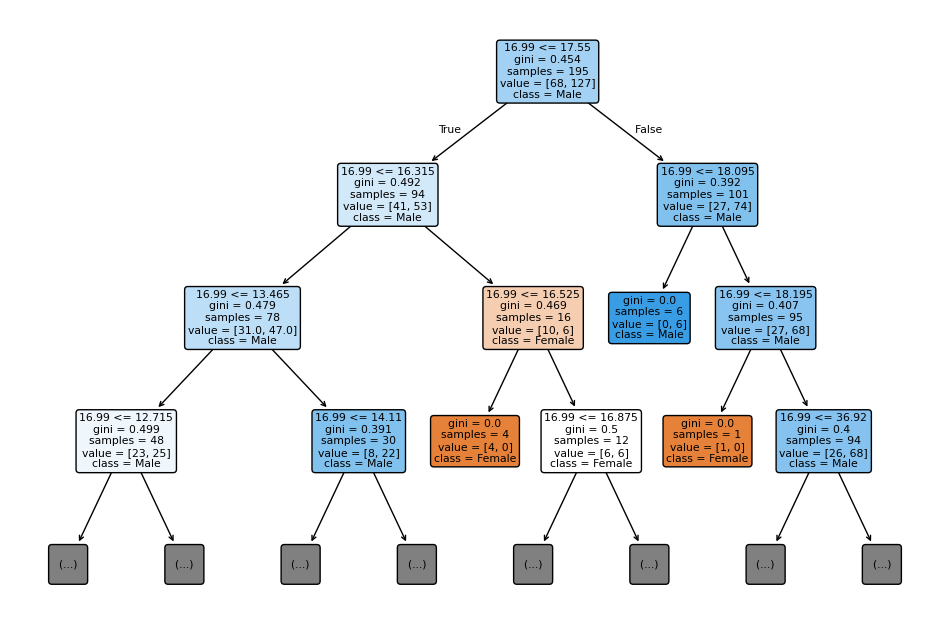

In [ ]:
plt.figure(figsize=(12,8))

plot_tree(model_dt, 
          feature_names = tips['total_bill'], # input features
          class_names = tips['sex'], # target name
          max_depth=3,
          filled = True,
          rounded=True )

plt.show()

### Random Forest 

- Ensemble methods are
    - combine the efforts of a lot of models


In [ ]:
# Bagging
model_rf = RandomForestClassifier(n_estimators=100) # classification
model_rf.fit(X_train, y_train) # fitting here, must be 
y_pred_rf = model_rf.predict(X_test)

In [ ]:
cr_rf = classification_report(y_test,y_pred_rf)
print("------------ decision tree---------\n")
print(cr_dt)
print("------------ random forest---------\n")
print(cr_rf)


------------ decision tree---------

              precision    recall  f1-score   support

           0       0.48      0.58      0.52        19
           1       0.69      0.60      0.64        30

    accuracy                           0.59        49
   macro avg       0.59      0.59      0.58        49
weighted avg       0.61      0.59      0.60        49

------------ random forest---------

              precision    recall  f1-score   support

           0       0.48      0.58      0.52        19
           1       0.69      0.60      0.64        30

    accuracy                           0.59        49
   macro avg       0.59      0.59      0.58        49
weighted avg       0.61      0.59      0.60        49



In [ ]:
# Boosting
model_ada = AdaBoostClassifier(n_estimators=100) # classification
model_ada.fit(X_train, y_train) # fitting here, must be 
y_pred_ada = model_rf.predict(X_test)

In [ ]:
cr_ada = classification_report(y_test,y_pred_ada)
print("------------ ADA---------\n")
print(cr_ada)
print("------------ random forest\n")
print(cr_rf)

------------ ADA---------

              precision    recall  f1-score   support

           0       0.48      0.58      0.52        19
           1       0.69      0.60      0.64        30

    accuracy                           0.59        49
   macro avg       0.59      0.59      0.58        49
weighted avg       0.61      0.59      0.60        49

------------ random forest

              precision    recall  f1-score   support

           0       0.48      0.58      0.52        19
           1       0.69      0.60      0.64        30

    accuracy                           0.59        49
   macro avg       0.59      0.59      0.58        49
weighted avg       0.61      0.59      0.60        49

